# 개요 

* 2024년 12회 산업통상자원부 공공데이터 활용 아이디어 공모전 참가해보기로 함
  * https://datacontest.kr/apply/applyAdd/3
* 니켈 뿐 아니라 타 광석에 대해 분석하여 제안배경에 대해 작성하기로 함

# 내용정리

## 지난 회의정리

* 내가 진행할 과업
  * UN Comtreade API개발한 것을 기반으로 광물별 데이터 저장 및 바로 사용할수 있도록 db화
    * 기존에 만들어둔 공공데이터포털 데이터 공유용 git을 활용하여 모든 데이터 관리 예정
      * 링크 : https://github.com/KR9268/db_datagokr
  * 분석을 구상하고 제안한 배경에 대해 작성
    * 기존의 니켈뿐 아니라 분석 대상 광석 전체에 대해 분석 진행
    * 해당 내용 기반으로 분석의 당위성 부여 예정
  * 활용데이터에 대한 정리
    * 활용한 외부데이터와 내용, 활용이유 정리
* 타 팀원들 진행할 과업
  * LSTM 등 예측 모델에 대한 설명
  * Prophet 등 이상탐지 모델에 대한 설명
  * 만들어둔 db활용하여 데이터 추가가공 및 전처리
  * 모델링 및 모델학습
* 다같이 진행할 과업
  * 분석으로 인한 기대(파급)효과 

# 보고서(제안배경) 초안 

## 제안배경

### 현황 및 제안목적

#### 탄소중립 등 환경에 대한 관심과, 전기차 배터리 등 미래 유망산업의 핵심광물 수요 증가
*  리튬, 니켈, 코발트, 망간은 전기차 이차전지의 원료로, 배터리 양극재 등에 필요한 핵심금속
* 세계은행 예상에 따르면 배터리 시장은 2050년까지 크게 성장할 전망<br>
(2050년에는 2018년 기준 450%이상 수요증가할 것으로 예상)<br>
  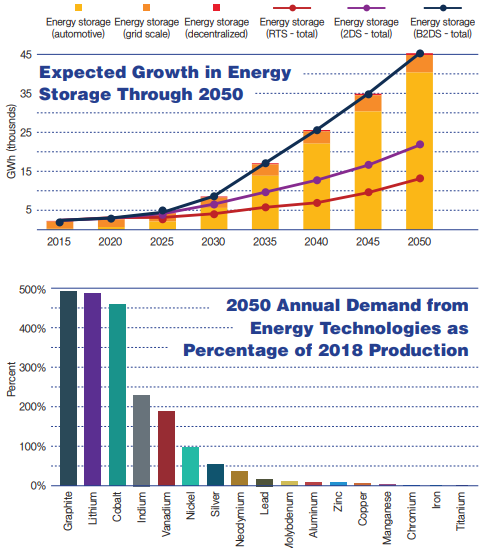<br>
**출처** : Minerals for Climate Action: The Mineral Intensity of the Clean Energy Transition(2020), The World Bank

#### 핵심광물 매장이 특정 국가에 심하게 편중되어 있어 상당한 공급망 리스크 존재
* 광물/국가별 매장량 추이
  * 니켈 : 인도네시아(42%), 호주(18.3%), 브라질(12.2%) 등<br>
    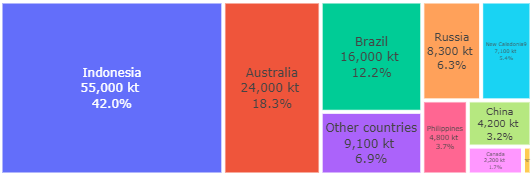
  * 코발트 : 콩고(57%), 호주(16.1%) 등<br>
    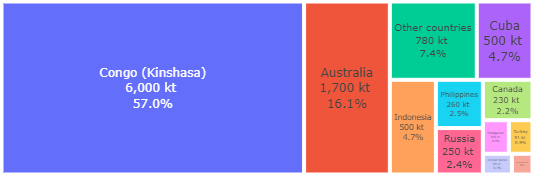
  * 리튬 : 칠레(33.6%), 호주(22.4%), 아르헨티나(13%) 등<br>
    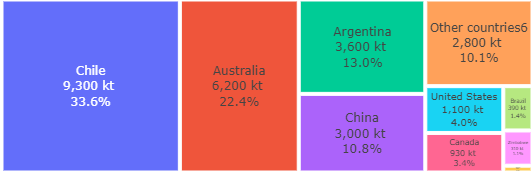
  * 망간 : 남아프리카(31.4%), 호주(26.2%), 중국(14.7%) 등<br>
    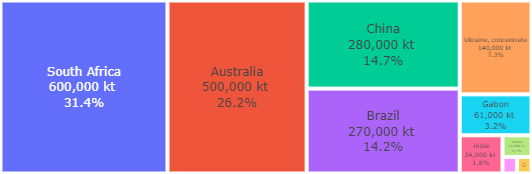<br>
**출처** : USGS Mineral Commodity Summaries 2024 데이터로 가공<br>
https://www.sciencebase.gov/catalog/item/65a6e45fd34e5af967a46749

#### 핵심광물 조달에 대한 수입경쟁 심화
* 각 광물에 대한 국가별 수입량은 2014년 대비 상승세를 보이고 있음
  * 다만, 리튬은 전기차 캐즘이나 배터리시장 경쟁심화 등 여러 요소로 감소된 것으로 추정
    * 배터리시장의 한국업체 점유율 전년비 5.3%하락
    * 전기차 캐즘 : Chasm, 대중화 전 수요가 감소하는 것
      
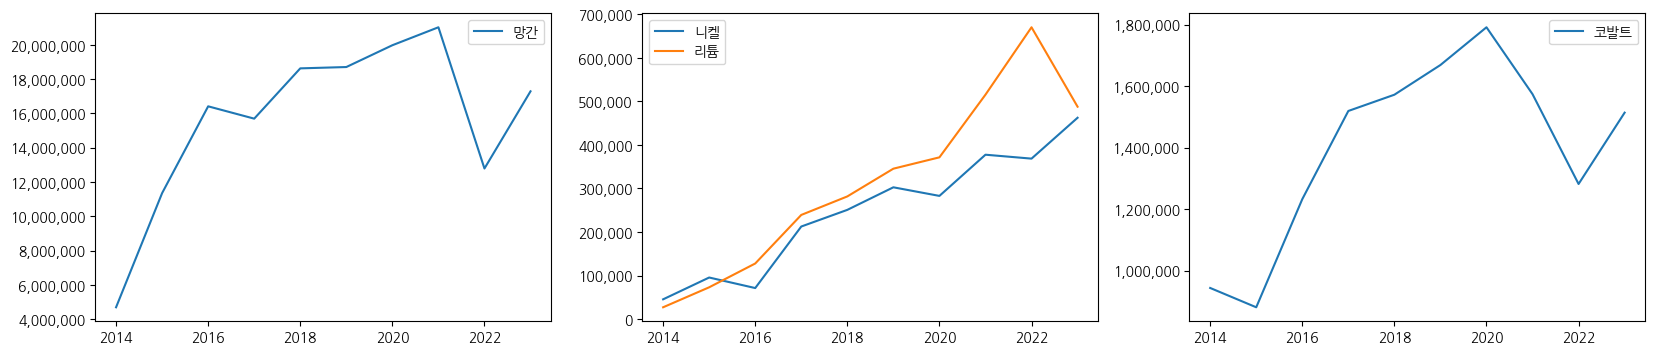

**출처** : USGS Mineral Commodity Summaries 2024 데이터로 가공<br>
https://www.sciencebase.gov/catalog/item/65a6e45fd34e5af967a46749

* 각 광물에 대한 국가별 수입량은 2014년 대비 상승세를 보이고 있음
  * 한국 : 희소금속 산업 발전대책 2.0 추진
  (확보-비축-순환 수급에 대한 3중 안정망 등)
  * 미국 : 중요 광물 공급을 위한 연방정부 전략 추진
  (수입의존 저감 및 공급망 확보 등)
  * 일본 : 신 국제자원 전략 추진
  (비축제도 재검토, 광종별 확보책 구축, 확보를 위한 국제협력 도출 등)
  * EU : EIP Raw materials 추진
  (자원의 채광,재활용 등에 대한 시험적 대응, 희소자원에 대한 대체 이용처 도출 등)

 **출처** : 한눈에 보는 6대 핵심광물 이슈분석, 한국지질자원연구원

* 광물별 상위 수입국 현황(하단 참조)

  * 광물별 상위 수입국 현황 - 니켈  (단위 : kt[킬로톤])
    * Index 0~4 : 1~5순위 / Index 5 : 합계

In [ ]:
target_ore = '니켈'

ores_uncomtrade_url[target_ore]['df_top5_html'] = ores_uncomtrade_url[target_ore]['df_top5'].copy()
for each_year in ores_uncomtrade_url[target_ore]['df_top5'].columns:
    ores_uncomtrade_url[target_ore]['df_top5_html'][each_year] = ores_uncomtrade_url[target_ore]['df_top5_html'][each_year].str.replace('\n','<br>')

# HWP파일 작성용 CSV저장, 자동 줄바꿈 적용시 아래 표기처럼 복사/붙여넣기 가능
ores_uncomtrade_url[target_ore]['df_top5'].to_excel(f"Top5Country_{target_ore}.xlsx")
display(HTML(ores_uncomtrade_url[target_ore]['df_top5_html'].to_html(escape=False)))

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Brazil29,012","Brazil34,127","Brazil19,720","Japan112,033","Japan135,167","Japan191,793","Japan200,127","Japan206,021","Japan173,627","China256,142"
1,"Germany11,705","Rep. of Korea27,394","China15,197","Rep. of Korea53,085","Rep. of Korea52,446","Belgium34,111","Belgium31,329","China98,853","China119,071","Japan124,779"
2,"Turkiye2,203","Canada16,517","Germany14,054","China21,639","Australia21,776","Rep. of Korea31,817","Canada21,353","Belgium41,121","Belgium43,286","Belgium41,815"
3,"Switzerland1,344","Germany12,654","Canada13,500","Germany13,939","Belgium20,963","Canada25,360","China16,340","Canada21,410","Canada18,103","Malaysia26,280"
4,"Spain1,292","Thailand4,923","Rep. of Korea8,951","India11,978","China20,569","Australia19,640","Australia13,834","Malaysia10,150","Rep. of Korea14,469","Canada13,364"
5,"45,555","95,615","71,421","212,674","250,921","302,721","282,983","377,554","368,556","462,380"


  * 광물별 상위 수입국 현황 - 코발트  (단위 : kt[킬로톤])

In [ ]:
target_ore = '코발트'

ores_uncomtrade_url[target_ore]['df_top5_html'] = ores_uncomtrade_url[target_ore]['df_top5'].copy()
for each_year in ores_uncomtrade_url[target_ore]['df_top5'].columns:
    ores_uncomtrade_url[target_ore]['df_top5_html'][each_year] = ores_uncomtrade_url[target_ore]['df_top5_html'][each_year].str.replace('\n','<br>')

# HWP파일 작성용 CSV저장, 자동 줄바꿈 적용시 아래 표기처럼 복사/붙여넣기 가능
ores_uncomtrade_url[target_ore]['df_top5'].to_excel(f"Top5Country_{target_ore}.xlsx")
display(HTML(ores_uncomtrade_url[target_ore]['df_top5_html'].to_html(escape=False)))

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Germany360,060","Germany366,375","USA444,837","USA496,572","USA471,603","United Kingdom546,036","Germany571,008","Germany660,773","Germany488,970","Germany529,288"
1,"Sweden213,809","Sweden220,380","Germany347,106","United Kingdom345,329","Germany329,296","Germany380,888","USA472,193","USA295,225","Italy250,075","United Kingdom395,371"
2,"Brazil154,625","Brazil124,744","Sweden201,729","Germany299,495","Finland277,965","USA348,198","United Kingdom371,668","Italy232,667","Brazil191,783","USA219,089"
3,"Netherlands124,798","Canada93,406","Brazil137,948","Italy195,547","United Kingdom264,720","Italy217,586","Italy217,804","United Kingdom198,261","Austria186,431","Japan189,547"
4,"Belgium90,674","Rep. of Korea76,266","Netherlands101,162","Sweden182,634","Italy228,860","France176,344","Sweden159,068","Sweden187,343","Sweden164,849","Sweden180,823"
5,"943,966","881,171","1,232,782","1,519,578","1,572,444","1,669,052","1,791,741","1,574,269","1,282,108","1,514,119"


  * 광물별 상위 수입국 현황 - 리튬  (단위 : kt[킬로톤])

In [ ]:
target_ore = '리튬'

ores_uncomtrade_url[target_ore]['df_top5_html'] = ores_uncomtrade_url[target_ore]['df_top5'].copy()
for each_year in ores_uncomtrade_url[target_ore]['df_top5'].columns:
    ores_uncomtrade_url[target_ore]['df_top5_html'][each_year] = ores_uncomtrade_url[target_ore]['df_top5_html'][each_year].str.replace('\n','<br>')

# HWP파일 작성용 CSV저장, 자동 줄바꿈 적용시 아래 표기처럼 복사/붙여넣기 가능
ores_uncomtrade_url[target_ore]['df_top5'].to_excel(f"Top5Country_{target_ore}.xlsx")
display(HTML(ores_uncomtrade_url[target_ore]['df_top5_html'].to_html(escape=False)))

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Belgium11,844","Rep. of Korea35,014","China47,227","Japan69,609","Rep. of Korea91,029","Rep. of Korea124,094","Rep. of Korea130,051","Rep. of Korea189,821","China278,358","China324,683"
1,"Spain6,852","Belgium18,782","USA33,806","China61,411","Japan86,273","Japan118,216","China101,259","China169,226","Rep. of Korea238,878","Japan109,344"
2,"Germany3,900","Canada7,502","Belgium24,300","Rep. of Korea55,620","China46,158","China59,437","Japan97,427","Japan108,999","Japan120,350","USA34,261"
3,"Turkiye3,313","Germany6,237","Russian Federation11,620","USA34,820","USA36,507","USA26,740","USA26,229","USA27,766","Netherlands17,332","Netherlands12,724"
4,"Netherlands1,376","Spain5,638","Canada10,842","Belgium17,840","Belgium21,817","France16,984","Belgium16,554","Russian Federation19,591","USA15,192","United Kingdom6,761"
5,"27,285","73,173","127,794","239,299","281,784","345,471","371,519","515,402","670,112","487,772"


  * 광물별 상위 수입국 현황 - 망간  (단위 : kt[킬로톤])

In [ ]:
target_ore = '망간'

ores_uncomtrade_url[target_ore]['df_top5_html'] = ores_uncomtrade_url[target_ore]['df_top5'].copy()
for each_year in ores_uncomtrade_url[target_ore]['df_top5'].columns:
    ores_uncomtrade_url[target_ore]['df_top5_html'][each_year] = ores_uncomtrade_url[target_ore]['df_top5_html'][each_year].str.replace('\n','<br>')

# HWP파일 작성용 CSV저장, 자동 줄바꿈 적용시 아래 표기처럼 복사/붙여넣기 가능
ores_uncomtrade_url[target_ore]['df_top5'].to_excel(f"Top5Country_{target_ore}.xlsx")
display(HTML(ores_uncomtrade_url[target_ore]['df_top5_html'].to_html(escape=False)))

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Germany1,762,753","China, Hong Kong SAR6,596,207","China, Hong Kong SAR6,430,363","China, Hong Kong SAR4,445,408","USA5,646,705","USA5,337,518","USA5,522,054","USA6,726,526","Germany4,296,848","USA7,890,263"
1,"Brazil1,139,607","Germany2,047,818","USA3,899,931","USA4,356,834","China, Hong Kong SAR5,317,808","China, Hong Kong SAR5,014,159","China, Hong Kong SAR4,943,913","Germany4,675,819","Japan2,842,379","Germany3,032,223"
2,"Belgium847,525","Belgium1,255,255","Germany3,361,475","Germany2,858,660","Germany2,722,953","Germany3,163,188","Germany4,058,559","China, Hong Kong SAR4,648,238","China, Hong Kong SAR2,556,882","Japan2,457,672"
3,"Spain498,741","Brazil1,015,417","Russian Federation1,509,007","Japan2,302,316","China2,504,820","China2,789,753","China2,812,012","Tunisia2,484,856","Poland1,565,781","China, Hong Kong SAR2,360,582"
4,"Turkiye457,040","Rep. of Korea443,342","China1,213,518","Russian Federation1,732,776","Japan2,433,654","Japan2,398,831","Japan2,636,763","Japan2,484,354","China1,529,201","Poland1,547,787"
5,"4,705,666","11,358,039","16,414,293","15,695,994","18,625,940","18,703,449","19,973,301","21,019,792","12,791,091","17,288,526"


**출처** : UN COMTRADE DB의 자료를 가공 <br>
**참고** : https://www.sedaily.com/NewsView/2D7TKJ4UE9

  * 핵심광물을 확보하기 위해 경쟁국들은 다양한 전략을 추진중
    * 한국 : 희소금속 산업 발전대책 2.0 추진 (확보-비축-순환 수급에 대한 3중 안정망 등)
    * 미국 : 중요 광물 공급을 위한 연방정부 전략 추진 (수입의존 저감 및 공급망 확보 등)
    * 일본 : 신 국제자원 전략 추진 (비축제도 재검토, 광종별 확보책 구축, 확보를 위한 국제협력 도출 등)
    * EU : EIP Raw materials 추진 (자원의 채광,재활용 등에 대한 시험적 대응, 희소자원에 대한 대체 이용처 도출 등)

 **출처** : 한눈에 보는 6대 핵심광물 이슈분석, 한국지질자원연구원

#### 현황요약 및 제안목적
* 아래와 같은 상황에서 한국도 핵심광물 비축이나 국산화 노력 등이 이루어지고 있음
  * 핵심광물의 수요증가(전기차 등 환경에 대한 관심과 배터리 시장의 성장)
  * 공급망 위기(생산지 편중)
  * 수급경쟁 심화(경쟁국의 확보전략 추진, 수입량 증대)
* 그럼에도 생산지 편중, 경쟁국은 통제 불가능 요소로, 여전히 공급망 리스크가 상당함
* 이러한 상황에서 미래 핵심산업의 경쟁력 확보를 이끌어낼 핵심 원재료(광물)의 확보를 위해,
각 상황에 대한 예측과 위기요소를 탐지할, 위기요소 탐지모델을 도입하고자 함

### 도입 방법

#### 분석대상 정립
* 핵심광물로 니켈, 코발트, 리튬, 망간을 지정하고, 국제기준인 6자리 HSCODE를 기준으로 함
  * 산화코발트(282200), 황산코발트(283329), 산화/수산화리튬(282520), 탄산리튬(283691)
  * 산화/수산화니켈(282540), 황산니켈(283324), 이산화망간(850610)

#### 고려요소(Feature) 선정
* 국가별 자원수입량을 통해 경쟁자의 활동(광물이동의 편중 등)을 관찰
  * 위의 HSCODE로 전세계 수출입현황을 알 수 있는 UN Comtrade DB API로 데이터 확보
* 중량당 가격(Price per Weight)을 가격변수로 고려
  * 수출입데이터의 Value(Price)와 Netweight로 연월 데이터 산출
* 핵심광물 생산지가 해외에 편중되어 국제운송이 필수이므로, 물류에 대해 BDI지수로 관찰
  * BDI : Baltic Dry Index. 원자재 운송에 사용되는 건화물선에 대한 운임비용 지수
  * 원자재 이동이라는 점에서 경기선행지표로도 인식되고 있음(향후 시장상황에 대한 지표)
    
#### 예측 및 이상탐지
- 고려요소에 대해 ARIMA, 홀트윈터스 지수평활법을 시작으로 LSTM 등 AI모델로 예측 진행
- 예측 데이터 기반으로 AnomalyDetection(R, 파이썬의 Prophet) 등을 활용한 이상탐지 진행

# 작성에 사용된 분석 코드

## USGS 자료분석 (광물별 매장량 산출)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import display, HTML
import plotly.express as px

In [ ]:
ores = {'니켈':
        {'csv_name':'mcs2024-nicke_world.csv',
        'csv_df':''},
         '코발트':
         {'csv_name':'mcs2024-cobal_world.csv',
        'csv_df':''},
         '리튬':
         {'csv_name':'mcs2024-lithi_world.csv',
        'csv_df':''},
         '망간':
         {'csv_name':'mcs2024-manga_world.csv',
        'csv_df':''}}

In [ ]:
# CSV리딩
for ore in ores.keys():
    # CSV리딩
    ores[ore]['csv_df'] = pd.read_csv(ores[ore]['csv_name'])

    # 데이터 전처리
    ## Null처리
    ores[ore]['csv_df'] = ores[ore]['csv_df'].filter(regex='^(?!Unnamed)').dropna(subset=['Country'])

    ## 킬로톤인 경우 톤으로 변환(컬럼 추가)
    if 'Reserves_kt' in ores[ore]['csv_df'].columns:
        ores[ore]['csv_df']['Reserves_t'] = ores[ore]['csv_df']['Reserves_kt'] * 1000

    ## 숫자에 섞인 기호 처리 후 변환
    if ores[ore]['csv_df']['Reserves_t'].dtype=='O':
        ores[ore]['csv_df']['Reserves_t'] = ores[ore]['csv_df']['Reserves_t'].str.replace('>','')
        ores[ore]['csv_df']['Reserves_t'] = ores[ore]['csv_df']['Reserves_t'].str.replace(',','')
        ores[ore]['csv_df']['Reserves_t'] = ores[ore]['csv_df']['Reserves_t'].str.strip().astype(int)
    
    ## 국가명 변환(튀르키예 등)
    ores[ore]['csv_df']['Country'] = ores[ore]['csv_df']['Country'].str.replace('T체rkiye','Turkiye')

    # 매장량 (실제값)
    ores[ore]['reserve_df_actual'] = ores[ore]['csv_df'].copy()
    ores[ore]['reserve_df_actual'] = pd.DataFrame(ores[ore]['csv_df'].groupby('Country').sum()['Reserves_t'])
    ores[ore]['reserve_df_actual']['Reserves_t'].astype(int)
    ores[ore]['reserve_df_actual'] = ores[ore]['reserve_df_actual'].drop('World total (rounded)')

    ores[ore]['reserve_df_actual'] = ores[ore]['reserve_df_actual'].copy()
    ores[ore]['reserve_df_actual']['Reserves_t_total'] = int(ores[ore]['reserve_df_actual'].sum().item())
    ores[ore]['reserve_df_actual']['Reserves_portion'] = ores[ore]['reserve_df_actual']['Reserves_t']/ores[ore]['reserve_df_actual']['Reserves_t_total']
    ores[ore]['reserve_df_actual'] = ores[ore]['reserve_df_actual'].sort_values(by='Reserves_portion', ascending=False)

In [ ]:
# 시각화용 DataFrame
for ore in ores.keys():
    ores[ore]['plotly_df'] = ores[ore]['reserve_df_actual'].copy()
    ores[ore]['plotly_df'] = ores[ore]['plotly_df'].reset_index()
    for i, _ in enumerate(ores[ore]['plotly_df'].index):
        value = f"{ores[ore]['plotly_df']['Country'][i]}<br>{int(ores[ore]['plotly_df']['Reserves_t'][i]/1000):,} kt <br>{ores[ore]['plotly_df']['Reserves_portion'][i]*100:.1f}%"
        ores[ore]['plotly_df'].loc.__setitem__((i, 'Country'), value)  

In [ ]:
for ore in ores.keys():
    # Data
    data = ores[ore]['plotly_df']

    # Create treemap
    fig = px.treemap(data, path=['Country'], values='Reserves_portion', title=ore,
                        labels=ores[ore]['plotly_df']['Reserves_t'], width=700, height=380)
    fig.update_traces(textposition='middle center')
    fig.show()

## UN Comtrade 자료분석(광물별 Top5수입국)

In [ ]:
ores_uncomtrade_url = {'니켈':
        {'csv_url':['https://raw.githubusercontent.com/KR9268/db_datagokr/main/282540,283324_merged(since2011).csv',
                    'https://raw.githubusercontent.com/KR9268/db_datagokr/main/282540,283324_merged(since2021).csv'],
        'csv_df':''},
         '코발트':
         {'csv_url':['https://raw.githubusercontent.com/KR9268/db_datagokr/main/282200,283329_merged(since2011).csv',
                    'https://raw.githubusercontent.com/KR9268/db_datagokr/main/282200,283329_merged(since2021).csv'],
        'csv_df':''},
         '리튬':
         {'csv_url':['https://raw.githubusercontent.com/KR9268/db_datagokr/main/282520,283691_merged(since2011).csv',
                    'https://raw.githubusercontent.com/KR9268/db_datagokr/main/282520,283691_merged(since2021).csv'],
        'csv_df':''},
         '망간':
         {'csv_url':['https://raw.githubusercontent.com/KR9268/db_datagokr/main/850610_merged(since2011).csv',
                    'https://raw.githubusercontent.com/KR9268/db_datagokr/main/850610_merged(since2021).csv'],
        'csv_df':''}}

In [ ]:
# CSV리딩
for ore in ores_uncomtrade_url.keys():
    temp_list_for_df_concat = []
    for each_url in ores_uncomtrade_url[ore]['csv_url']:
        temp_list_for_df_concat.append(pd.read_csv(each_url, encoding='cp949', low_memory=False))
    ores_uncomtrade_url[ore]['csv_df'] = pd.concat(temp_list_for_df_concat)

In [ ]:
# 기간데이터 전처리 & 데이터 가공 및 순위산출

def preprocess_df(df_copy):
    # 날짜변환
    df_copy['period'] = df_copy['period'].astype('int').astype('str')
    df_copy['period_year'] = df_copy['period'].str[:4]
    df_copy['period_month'] = df_copy['period'].str[-2:]
    df_copy['period_dateformat'] = pd.to_datetime(df_copy['refPeriodId'], format='%Y%m%d')

    # 단위당 가격
    df_copy['value_per_qty'] = df_copy['primaryValue']/df_copy['qty']
    df_copy['value_per_qty'] = df_copy['value_per_qty'].replace([np.inf, -np.inf], 0)

    # 국가명 변환(튀르키예 등)
    df_copy['reporterDesc'] = df_copy['reporterDesc'].str.replace('T체rkiye','Turkiye')
    df_copy['partnerDesc'] = df_copy['partnerDesc'].str.replace('T체rkiye','Turkiye')
    return df_copy

for ore in ores_uncomtrade_url.keys():
    ## 기간데이터 전처리
    ores_uncomtrade_url[ore]['csv_df'] = preprocess_df(ores_uncomtrade_url[ore]['csv_df'])
    ## 데이터 가공 및 순위산출(groupby)
    ores_uncomtrade_url[ore]['df_groupby_value'] =ores_uncomtrade_url[ore]['csv_df'][ores_uncomtrade_url[ore]['csv_df']['flowCode']=='M'].groupby(['refYear','reporterDesc']).sum(numeric_only=True)['primaryValue']
    ores_uncomtrade_url[ore]['df_groupby_value'] =ores_uncomtrade_url[ore]['csv_df'][ores_uncomtrade_url[ore]['csv_df']['flowCode']=='M'].groupby(['refYear','reporterDesc']).sum(numeric_only=True)['qty']
    #ores_uncomtrade_url[ore]['df_groupby_value'] =ores_uncomtrade_url[ore]['csv_df'][ores_uncomtrade_url[ore]['csv_df']['flowCode']=='M'].groupby(['refYear','reporterDesc']).sum(numeric_only=True)['value_per_qty']

In [ ]:
# 상위 5개국 산출

def return_top5(df_groupby, list_removing_year):
    dict_top_all_year = {}
    dict_top_all_year_value = {}
    dict_top_all_year_total = {}
    dict_top_all_year_value_sum = {}

    year_index = list(set(df_groupby.index.get_level_values(0)))
    for _ in list_removing_year:
        year_index.remove(_)
    year_index.sort()

    for each_year in year_index:
        top5 = df_groupby[each_year].sort_values(ascending=False)
        if 'World' in top5.index:
            top5 = top5.drop('World')
        top5_index = top5.index.tolist()[:5]

        top5_value = []
        top5_index_and_value=[]
        for index_country in top5_index:
            # top5_value.append(top5[index_country])
            # top5_index_and_value.append(f"{index_country}\n{top5[index_country]:,.0f}")

            top5_value.append(top5[index_country]/1000)
            top5_index_and_value.append(f"{index_country}\n{top5[index_country]/1000:,.0f}")
        
        dict_top_all_year[each_year] = top5_index
        dict_top_all_year_value[each_year] = top5_value

        dict_top_all_year_total[each_year] = top5_index_and_value
        dict_top_all_year_value_sum[each_year] = f"{sum(top5_value):,.0f}"

    return pd.concat([pd.DataFrame(dict_top_all_year_total), 
                      pd.DataFrame(dict_top_all_year_value_sum, 
                                   index=[5])]) 

for ore in ores_uncomtrade_url.keys():
    ores_uncomtrade_url[ore]['df_top5'] = return_top5(ores_uncomtrade_url[ore]['df_groupby_value'], [2011,2012,2013,2024])

In [ ]:
target_ore = '코발트'

ores_uncomtrade_url[target_ore]['df_top5_html'] = ores_uncomtrade_url[target_ore]['df_top5'].copy()
for each_year in ores_uncomtrade_url[target_ore]['df_top5'].columns:
    ores_uncomtrade_url[target_ore]['df_top5_html'][each_year] = ores_uncomtrade_url[target_ore]['df_top5_html'][each_year].str.replace('\n','<br>')

# HWP파일 작성용 CSV저장, 자동 줄바꿈 적용시 아래 표기처럼 복사/붙여넣기 가능
ores_uncomtrade_url[target_ore]['df_top5'].to_excel(f"Top5Country_{target_ore}.xlsx")
display(HTML(ores_uncomtrade_url[target_ore]['df_top5_html'].to_html(escape=False)))

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Germany360,060","Germany366,375","USA444,837","USA496,572","USA471,603","United Kingdom546,036","Germany571,008","Germany660,773","Germany488,970","Germany529,288"
1,"Sweden213,809","Sweden220,380","Germany347,106","United Kingdom345,329","Germany329,296","Germany380,888","USA472,193","USA295,225","Italy250,075","United Kingdom395,371"
2,"Brazil154,625","Brazil124,744","Sweden201,729","Germany299,495","Finland277,965","USA348,198","United Kingdom371,668","Italy232,667","Brazil191,783","USA219,089"
3,"Netherlands124,798","Canada93,406","Brazil137,948","Italy195,547","United Kingdom264,720","Italy217,586","Italy217,804","United Kingdom198,261","Austria186,431","Japan189,547"
4,"Belgium90,674","Rep. of Korea76,266","Netherlands101,162","Sweden182,634","Italy228,860","France176,344","Sweden159,068","Sweden187,343","Sweden164,849","Sweden180,823"
5,"943,966","881,171","1,232,782","1,519,578","1,572,444","1,669,052","1,791,741","1,574,269","1,282,108","1,514,119"


In [ ]:
target_ore = '리튬'

ores_uncomtrade_url[target_ore]['df_top5_html'] = ores_uncomtrade_url[target_ore]['df_top5'].copy()
for each_year in ores_uncomtrade_url[target_ore]['df_top5'].columns:
    ores_uncomtrade_url[target_ore]['df_top5_html'][each_year] = ores_uncomtrade_url[target_ore]['df_top5_html'][each_year].str.replace('\n','<br>')

# HWP파일 작성용 CSV저장, 자동 줄바꿈 적용시 아래 표기처럼 복사/붙여넣기 가능
ores_uncomtrade_url[target_ore]['df_top5'].to_excel(f"Top5Country_{target_ore}.xlsx")
display(HTML(ores_uncomtrade_url[target_ore]['df_top5_html'].to_html(escape=False)))

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Belgium11,844","Rep. of Korea35,014","China47,227","Japan69,609","Rep. of Korea91,029","Rep. of Korea124,094","Rep. of Korea130,051","Rep. of Korea189,821","China278,358","China324,683"
1,"Spain6,852","Belgium18,782","USA33,806","China61,411","Japan86,273","Japan118,216","China101,259","China169,226","Rep. of Korea238,878","Japan109,344"
2,"Germany3,900","Canada7,502","Belgium24,300","Rep. of Korea55,620","China46,158","China59,437","Japan97,427","Japan108,999","Japan120,350","USA34,261"
3,"Turkiye3,313","Germany6,237","Russian Federation11,620","USA34,820","USA36,507","USA26,740","USA26,229","USA27,766","Netherlands17,332","Netherlands12,724"
4,"Netherlands1,376","Spain5,638","Canada10,842","Belgium17,840","Belgium21,817","France16,984","Belgium16,554","Russian Federation19,591","USA15,192","United Kingdom6,761"
5,"27,285","73,173","127,794","239,299","281,784","345,471","371,519","515,402","670,112","487,772"


In [ ]:
target_ore = '망간'

ores_uncomtrade_url[target_ore]['df_top5_html'] = ores_uncomtrade_url[target_ore]['df_top5'].copy()
for each_year in ores_uncomtrade_url[target_ore]['df_top5'].columns:
    ores_uncomtrade_url[target_ore]['df_top5_html'][each_year] = ores_uncomtrade_url[target_ore]['df_top5_html'][each_year].str.replace('\n','<br>')

# HWP파일 작성용 CSV저장, 자동 줄바꿈 적용시 아래 표기처럼 복사/붙여넣기 가능
ores_uncomtrade_url[target_ore]['df_top5'].to_excel(f"Top5Country_{target_ore}.xlsx")
display(HTML(ores_uncomtrade_url[target_ore]['df_top5_html'].to_html(escape=False)))

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Germany1,762,753","China, Hong Kong SAR6,596,207","China, Hong Kong SAR6,430,363","China, Hong Kong SAR4,445,408","USA5,646,705","USA5,337,518","USA5,522,054","USA6,726,526","Germany4,296,848","USA7,890,263"
1,"Brazil1,139,607","Germany2,047,818","USA3,899,931","USA4,356,834","China, Hong Kong SAR5,317,808","China, Hong Kong SAR5,014,159","China, Hong Kong SAR4,943,913","Germany4,675,819","Japan2,842,379","Germany3,032,223"
2,"Belgium847,525","Belgium1,255,255","Germany3,361,475","Germany2,858,660","Germany2,722,953","Germany3,163,188","Germany4,058,559","China, Hong Kong SAR4,648,238","China, Hong Kong SAR2,556,882","Japan2,457,672"
3,"Spain498,741","Brazil1,015,417","Russian Federation1,509,007","Japan2,302,316","China2,504,820","China2,789,753","China2,812,012","Tunisia2,484,856","Poland1,565,781","China, Hong Kong SAR2,360,582"
4,"Turkiye457,040","Rep. of Korea443,342","China1,213,518","Russian Federation1,732,776","Japan2,433,654","Japan2,398,831","Japan2,636,763","Japan2,484,354","China1,529,201","Poland1,547,787"
5,"4,705,666","11,358,039","16,414,293","15,695,994","18,625,940","18,703,449","19,973,301","21,019,792","12,791,091","17,288,526"


In [ ]:
target_ore = '니켈'

ores_uncomtrade_url[target_ore]['df_top5_html'] = ores_uncomtrade_url[target_ore]['df_top5'].copy()
for each_year in ores_uncomtrade_url[target_ore]['df_top5'].columns:
    ores_uncomtrade_url[target_ore]['df_top5_html'][each_year] = ores_uncomtrade_url[target_ore]['df_top5_html'][each_year].str.replace('\n','<br>')

# HWP파일 작성용 CSV저장, 자동 줄바꿈 적용시 아래 표기처럼 복사/붙여넣기 가능
ores_uncomtrade_url[target_ore]['df_top5'].to_excel(f"Top5Country_{target_ore}.xlsx")
display(HTML(ores_uncomtrade_url[target_ore]['df_top5_html'].to_html(escape=False)))

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Brazil29,012","Brazil34,127","Brazil19,720","Japan112,033","Japan135,167","Japan191,793","Japan200,127","Japan206,021","Japan173,627","China256,142"
1,"Germany11,705","Rep. of Korea27,394","China15,197","Rep. of Korea53,085","Rep. of Korea52,446","Belgium34,111","Belgium31,329","China98,853","China119,071","Japan124,779"
2,"Turkiye2,203","Canada16,517","Germany14,054","China21,639","Australia21,776","Rep. of Korea31,817","Canada21,353","Belgium41,121","Belgium43,286","Belgium41,815"
3,"Switzerland1,344","Germany12,654","Canada13,500","Germany13,939","Belgium20,963","Canada25,360","China16,340","Canada21,410","Canada18,103","Malaysia26,280"
4,"Spain1,292","Thailand4,923","Rep. of Korea8,951","India11,978","China20,569","Australia19,640","Australia13,834","Malaysia10,150","Rep. of Korea14,469","Canada13,364"
5,"45,555","95,615","71,421","212,674","250,921","302,721","282,983","377,554","368,556","462,380"


## UN Comtrade 자료분석(연도별 광물수입량 산출)

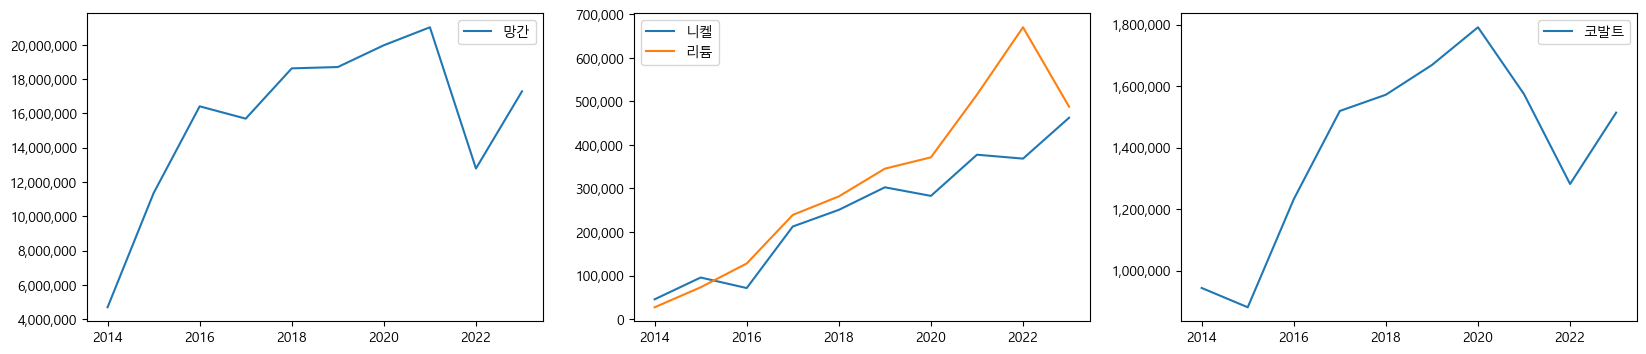

In [ ]:
plt.rcParams['font.family'] = 'Nanum Gothic'

fig, ax = plt.subplots(figsize=(20, 4), ncols=3)

for ore in ores_uncomtrade_url.keys():
    sns_index = ores_uncomtrade_url[ore]['df_top5'].columns.tolist()
    sns_value = ores_uncomtrade_url[ore]['df_top5'].values[5].tolist()
    sns_df = pd.DataFrame(sns_value, index=sns_index, columns=[ore])
    sns_df = sns_df[ore].str.replace(',','').astype(int)

    if ore in ['망간']:
        target_ax = ax[0]
    elif ore in ['니켈','리튬']:
        target_ax = ax[1]
    elif ore in ['니켈','코발트']:
        target_ax = ax[2]

    sns_df.plot(ax=target_ax)

    target_ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))

for each_ax in ax:
    each_ax.legend()